In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
random_state = 42

In [45]:
df = pd.read_csv('wallet_dataset.csv')

print("Dataset Shape:", df.shape)

df.head(5)

Dataset Shape: (1221, 17)


,wallet_address,first_tx_date,last_tx_date,tx_count,active_days,avg_tx_per_day,total_gas_spent,total_nft_buys,total_nft_sells,total_nft_volume_usd,unique_nfts_owned,dex_trades,avg_trade_size_usd,total_traded_usd,erc20_receive_usd,erc20_send_usd,native_balance_delta
0,0x000000000000000000000000000000000000dead,2025-08-30 18:40:11.000 UTC,2025-11-28 16:08:23.000 UTC,1767.0,90,19,0.759658,17963024.0,17558.0,3.844577e+08,112763,10150882.0,107.003156,1.048650e+09,1.148467e+15,1.201438e+05,0.232431
1,0x0000000000000792b907283999351c9587689a82,2025-08-30 16:36:23.000 UTC,2025-11-28 16:23:59.000 UTC,28450.0,91,312,14.849973,2005.0,0.0,0.000000e+00,1698,74571.0,916.841248,5.984039e+07,0.000000e+00,4.635820e+01,-1.610003
2,0x00000000000124d994209fbb955e0217b5c2eca1,2025-08-30 16:30:23.000 UTC,2025-11-28 16:23:35.000 UTC,27499.0,91,302,3.315592,3799.0,0.0,7.126536e-02,3124,18769.0,1050.425660,1.971544e+07,0.000000e+00,0.000000e+00,-14.261347
3,0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,2025-09-28 09:43:59.000 UTC,2025-11-13 14:47:11.000 UTC,2.0,2,1,0.000075,27468.0,5376.0,6.836220e-05,9310,2717068.0,7172.788042,1.927236e+10,2.208333e+13,2.208333e+13,0.000000
4,0x000000002a634f97eef66251b538046514d94f4a,2025-08-30 16:54:11.000 UTC,2025-11-28 16:22:23.000 UTC,25859.0,91,284,12.010983,2326.0,0.0,3.463276e-03,1971,84857.0,953.686072,7.616614e+07,7.271904e-04,0.000000e+00,-5.570000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wallet_address        1221 non-null   object 
 1   first_tx_date         1221 non-null   object 
 2   last_tx_date          1221 non-null   object 
 3   tx_count              1221 non-null   float64
 4   active_days           1221 non-null   int64  
 5   avg_tx_per_day        1221 non-null   int64  
 6   total_gas_spent       1221 non-null   float64
 7   total_nft_buys        1221 non-null   float64
 8   total_nft_sells       1221 non-null   float64
 9   total_nft_volume_usd  1221 non-null   float64
 10  unique_nfts_owned     1221 non-null   int64  
 11  dex_trades            1221 non-null   float64
 12  avg_trade_size_usd    1221 non-null   float64
 13  total_traded_usd      1221 non-null   float64
 14  erc20_receive_usd     1221 non-null   float64
 15  erc20_send_usd       

In [47]:
df.describe()

,tx_count,active_days,avg_tx_per_day,total_gas_spent,total_nft_buys,total_nft_sells,total_nft_volume_usd,unique_nfts_owned,dex_trades,avg_trade_size_usd,total_traded_usd,erc20_receive_usd,erc20_send_usd,native_balance_delta
count,1.221000e+03,1221.000000,1221.000000,1221.000000,1.221000e+03,1.221000e+03,1.221000e+03,1221.000000,1.221000e+03,1221.000000,1.221000e+03,1.221000e+03,1.221000e+03,1.221000e+03
mean,4.062119e+04,45.772318,484.177723,10.046141,3.351003e+04,3.879629e+04,1.219260e+06,3385.015561,1.205063e+06,1925.278005,1.824506e+09,2.801619e+13,2.761978e+13,-1.716877e+04
std,1.336338e+05,37.829478,1505.857915,93.537523,5.168388e+05,5.943086e+05,2.877651e+07,5064.686039,1.554723e+07,8189.218314,1.963480e+10,5.496949e+14,5.492323e+14,2.270375e+05
min,1.000000e+00,1.000000,1.000000,0.000002,0.000000e+00,0.000000e+00,-2.486846e+08,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-4.831991e+06
25%,1.400000e+01,6.000000,2.000000,0.001101,1.652000e+03,0.000000e+00,0.000000e+00,492.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-4.060448e+00
50%,1.950000e+02,39.000000,5.000000,0.025455,6.208000e+03,1.000000e+00,0.000000e+00,1898.000000,5.700000e+01,73.498919,6.431853e+03,3.755238e+01,9.717360e+01,-2.052813e-02
75%,2.680500e+04,91.000000,308.000000,2.268926,1.516900e+04,2.925000e+03,7.251043e-03,4694.000000,7.790000e+02,574.837671,3.273444e+05,4.805854e+04,9.082151e+04,0.000000e+00
max,1.816037e+06,91.000000,19956.000000,2325.040368,1.796302e+07,1.737792e+07,6.549682e+08,112763.000000,4.735565e+08,170858.829978,4.810422e+11,1.749981e+16,1.749981e+16,4.822952e+05


In [48]:
df.isnull().sum()

wallet_address          0
first_tx_date           0
last_tx_date            0
tx_count                0
active_days             0
avg_tx_per_day          0
total_gas_spent         0
total_nft_buys          0
total_nft_sells         0
total_nft_volume_usd    0
unique_nfts_owned       0
dex_trades              0
avg_trade_size_usd      0
total_traded_usd        0
erc20_receive_usd       0
erc20_send_usd          0
native_balance_delta    0
dtype: int64

In [49]:
# df["is_contract_guess"] = (
#     ((df["tx_count"] > 50000) & (df["active_days"] < 3)) |
#     (df["total_gas_spent"] == 0)
# ).astype(int)
df["is_contract_guess"] = (
    ((df["tx_count"] > 50000)) |
    (df["total_gas_spent"] == 0)
).astype(int)
df["is_contract_guess"].value_counts()

is_contract_guess
0    1024
1     197
Name: count, dtype: int64

In [50]:
feature_cols = [
    'tx_count',
    'active_days',
    'avg_tx_per_day',
    'total_gas_spent',
    'total_nft_buys',
    'total_nft_sells',
    'total_nft_volume_usd',
    'unique_nfts_owned',
    'dex_trades',
    'avg_trade_size_usd',
    'total_traded_usd',
    'erc20_receive_usd',
    'erc20_send_usd',
    'native_balance_delta'
]

X = df[feature_cols].copy()

In [51]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)

X_transformed = pt.fit_transform(X)

X_scaled = pd.DataFrame(X_transformed, columns=X.columns)

print(X_scaled.skew().sort_values(ascending=False))
X_scaled.head()

native_balance_delta    1.191020
total_gas_spent         0.778021
erc20_receive_usd       0.380222
total_nft_sells         0.353499
erc20_send_usd          0.322833
avg_tx_per_day          0.310397
dex_trades              0.187883
total_nft_buys          0.146421
tx_count                0.078047
total_traded_usd        0.065175
avg_trade_size_usd      0.031014
unique_nfts_owned      -0.188586
active_days            -0.268884
total_nft_volume_usd   -4.440570
dtype: float64


,tx_count,active_days,avg_tx_per_day,total_gas_spent,total_nft_buys,total_nft_sells,total_nft_volume_usd,unique_nfts_owned,dex_trades,avg_trade_size_usd,total_traded_usd,erc20_receive_usd,erc20_send_usd,native_balance_delta
0,0.395368,1.051592,0.162342,0.379833,7.791747,1.367354,9.689606,4.734346,1.883089,0.263732,1.620410,1.916464,0.895243,0.012352
1,1.037846,1.064996,1.082939,1.704029,-0.376973,-0.930812,-0.006943,0.007302,1.419572,0.912443,1.307675,-0.970378,-0.181149,0.012332
2,1.030423,1.064996,1.074859,1.268653,-0.119640,-0.930812,-0.006943,0.406425,1.238731,0.952495,1.179900,-0.970378,-1.007410,0.012211
3,-1.391791,-1.383252,-1.136381,-0.777438,0.875981,1.225514,-0.006943,1.310731,1.781803,1.504464,1.914957,1.859771,1.882361,0.012349
4,1.016970,1.064996,1.059471,1.669017,-0.319610,-0.930812,-0.006943,0.098850,1.435171,0.924058,1.334944,-0.970180,-1.007410,0.012292


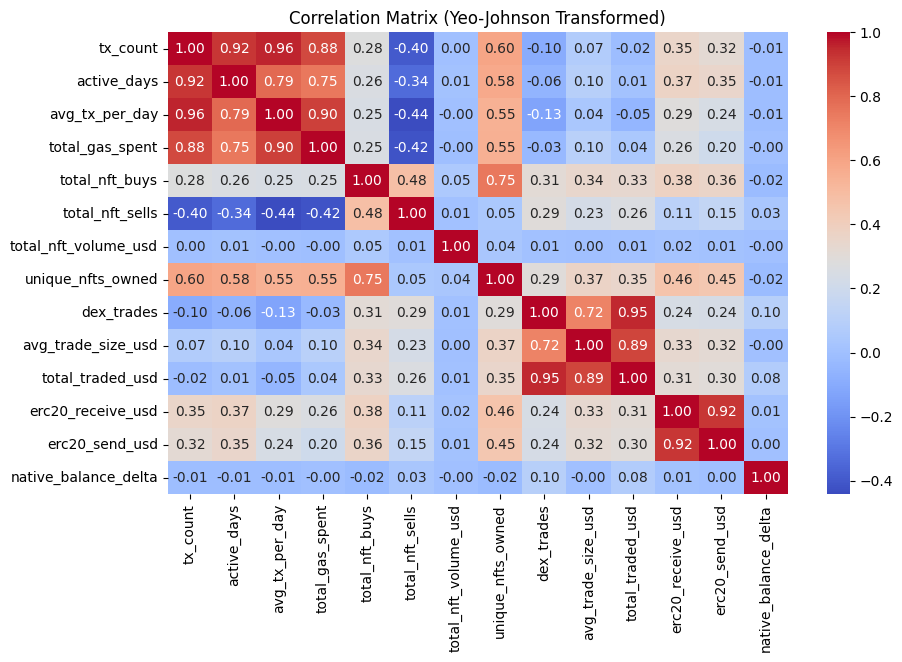

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_scaled.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Yeo-Johnson Transformed)")
plt.show()

In [53]:
print("\nPCA for dimentionality insights")
pca = PCA(n_components=None, random_state=random_state)

pca_results = pca.fit_transform(X_scaled)


PCA for dimentionality insights


In [54]:
print("Explained Variance Ratios by PCA Components:", np.round(pca.explained_variance_ratio_, 3))

Explained Variance Ratios by PCA Components: [0.35  0.243 0.1   0.08  0.071 0.07  0.027 0.019 0.019 0.008 0.007 0.005
 0.001 0.   ]


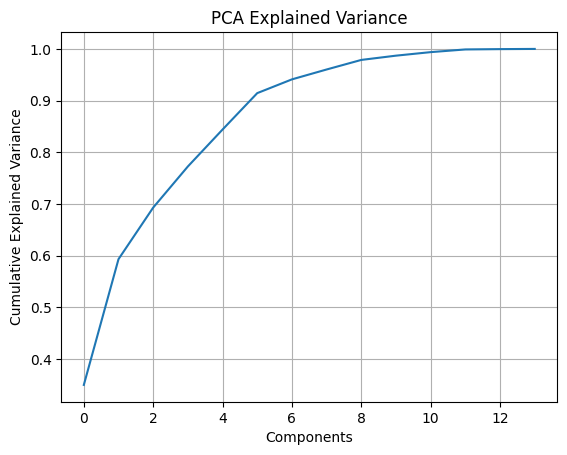

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


In [56]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, random_state=random_state, n_jobs=-1)
tsne_result = tsne.fit_transform(X_scaled)

tsne_result

array([[ 13.301581,  23.916388],
       [ 11.76024 , -32.26595 ],
       [ 10.38491 , -30.407473],
       ...,
       [-13.283132, -25.563719],
       [-26.138165, -17.641403],
       [ 35.322453, -16.372799]], shape=(1221, 2), dtype=float32)

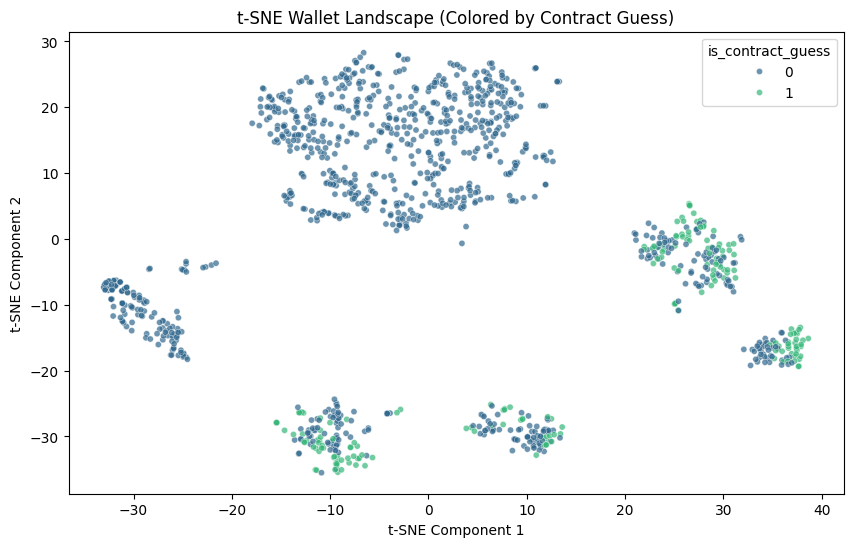

In [57]:
df["tsne1"] = tsne_result[:,0]
df["tsne2"] = tsne_result[:,1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne1", y="tsne2", 
    data=df, hue="is_contract_guess", 
    palette="viridis", alpha=0.7, s= 20,
    legend="full"
)
plt.title("t-SNE Wallet Landscape (Colored by Contract Guess)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [58]:
cleaned_df = df.copy()
cleaned_df_features = X_scaled.copy()
cleaned_df_features["wallet_address"] = df["wallet_address"]
cleaned_df_features["is_contract_guess"] = df["is_contract_guess"]
cleaned_df_features.to_csv("wallet_features_scaled.csv", index=False)


In [59]:
import joblib
joblib.dump(pt, "wallet_power_transformer.pkl")

['wallet_power_transformer.pkl']